In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf


In [3]:
df_combo=pd.read_excel('Raman_SEM_Merged.xlsx')
df_combo=df_combo.loc[df_combo['Fo']>0].reset_index(drop=True)
len(df_combo)

81

In [4]:
df_combo

,Unnamed: 0.1,Unnamed: 0,Mount,filename,Name_on_SEM,Notes regarding SEM matching,Unnamed: 5,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),...,Line_Ca,Line_Mn,Line_Fe,Line_Ni,Line_Al,Line_Ti,Line_Cr,Line_Cu,SampleID,Fo
0,9,9,A,K24_10_FIA,K24_10_FIA,NaN,K24_10_FIA,0.048859,0.004082,0.001386,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,K24_10_FIA,0.866691
1,10,10,A,K24_10_FIB,K24_10_FIB,NaN,K24_10_FIB,0.056119,0.004361,0.002092,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,K24_10_FIB,0.867048
2,11,11,A,K24_11_FIA,"K24_11_FIA,B",NaN,K24_11_FIA,0.125982,0.004292,0.001919,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,"K24_11_FIA,B",0.853562
3,12,12,A,K24_11_FIB,"K24_11_FIA,B",NaN,K24_11_FIB,0.085747,0.012513,0.011921,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,"K24_11_FIA,B",0.853562
4,13,13,A,K24_11_FIC,K24_11_FIC,NaN,K24_11_FIC,0.129648,0.004284,0.001886,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,K24_11_FIC,0.854730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,93,93,A,KL0919-008-A,KL0919_008_FIA,NaN,919_008_A,0.452379,0.002782,0.001487,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,KL0919_008_FIA,0.885386
77,94,94,A,KL0919-009-A,KL0919_009_FIA,NaN,919_009_A,0.155276,0.004816,0.002802,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,KL0919_009_FIA,0.888669
78,95,95,NaN,KL0919-010-A,KL0919_010_FIA,NaN,919_010_A,0.119384,0.004053,0.001334,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,KL0919_010_FIA,0.887075
79,96,96,NaN,KL0919-010-B,KL0919_010_FIA,NaN,919_010_B,0.105191,0.008116,0.007167,...,K series,K series,K series,Kα,NaN,NaN,NaN,NaN,KL0919_010_FIA,0.887075


## Lets load over the XH2O correction
- This is from DeVitre and Wieser (2024) GPL

In [6]:
import pickle
# This is the lowest XH2O
with open('Pf.pkl', 'rb') as f:
    Pf_low = pickle.load(f)

# This is the median XH2O
with open('Pf3.pkl', 'rb') as f:
    Pf_max = pickle.load(f)

# This is the Max H2O
with open('Pf4.pkl', 'rb') as f:
    Pf_med = pickle.load(f)

## Lets load over the Temp vs Fo correction
- Also from DeVitre and Wieser (2024)

In [8]:
with open('TempFoModel.pkl', 'rb') as f:
    Pf_TempFo = pickle.load(f)

In [9]:
SO2_frac=pf.calculate_mole_fraction_2comp(peak_area_a=df_combo['Peak_Area_SO2'], peak_area_b=df_combo['Diad1_Voigt_Area']+df_combo['Diad2_Voigt_Area'],
                                  cross_section_a=5.3, cross_section_b=1.4+0.89, instrument_eff_a=1, instrument_eff_b=1)['% A']

## temp 

In [10]:

df_combo['Temp_from_Fo_all']=Pf_TempFo(df_combo['Fo'])
MeanT=np.nanmean(df_combo['Temp_from_Fo_all'])
df_combo['Temp_from_Fo_all'] = df_combo['Temp_from_Fo_all'].fillna(MeanT)

# Create 'Temp_error' column based on whether 'Temp_from_Fo' is a number
df_combo['Temp_error'] = np.where(df_combo['Temp_from_Fo_all'] == MeanT, 100, 50)


In [11]:
np.nanstd(df_combo['Temp_from_Fo_all'])

37.68691368240039

## Pure CO2 pressure

In [12]:
P_SW96=pf.calculate_P_for_rho_T(CO2_dens_gcm3=df_combo['Density g/cm3'], 
                                T_K=df_combo['Temp_from_Fo_all']+273.15, EOS='SW96')
P_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3
0,0.146670,14.667029,1536.589652,0.048859
1,0.169413,16.941292,1537.338539,0.056119
2,0.393081,39.308146,1510.998480,0.125982
3,0.259715,25.971509,1510.998480,0.085747
4,0.406249,40.624924,1513.124799,0.129648


In [13]:
## Lets calculate XH2O from Kil
XH2O_av=1-Pf_med(P_SW96['P_MPa'])
XH2O_av[XH2O_av<0]=0.02

XH2O_min=1-Pf_low(P_SW96['P_MPa'])
XH2O_min[XH2O_min<0]=0.02

XH2O_max=1-Pf_max(P_SW96['P_MPa'])
XH2O_max[XH2O_max<0]=0.02

df_combo['XH2O']=XH2O_av
df_combo['XH2O']=df_combo['XH2O'].fillna(0)

## CAlculate DZ EOS using the XH2O calc above 

In [14]:
P_DZ06=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_av, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MinXH2O=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_min, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MaxXH2O=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_max, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)

In [15]:
# Now lets do one more iteration - multiple ones really dont change much. 
XH2O_av2=1-Pf_med(100*P_DZ06['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_av2[XH2O_av2<0]=0.02

XH2O_min2=1-Pf_low(100*P_DZ06_MinXH2O['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_min2[XH2O_min2<0]=0.02

XH2O_max2=1-Pf_max(100*P_DZ06_MaxXH2O['P_kbar_mixCO2_DZ06_no_Hloss'])
XH2O_max2[XH2O_max2<0]=0.02

P_DZ062=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_av2, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MinXH2O2=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_min2, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)
P_DZ06_MaxXH2O2=pf.calculate_entrapment_P_XH2O(XH2O=XH2O_max2, CO2_dens_gcm3=df_combo['Density g/cm3'],
                 T_K=df_combo['Temp_from_Fo_all']+273.15, T_K_ambient=37+273.15, fast_calcs=False, Hloss=True)


(array([ 6.,  3., 14.,  9.,  5., 13.,  2.,  1., 10., 18.]),
 array([1194.456105  , 1206.52699167, 1218.59787834, 1230.66876501,
        1242.73965168, 1254.81053835, 1266.88142502, 1278.95231169,
        1291.02319836, 1303.09408503, 1315.1649717 ]),
 <BarContainer object of 10 artists>)

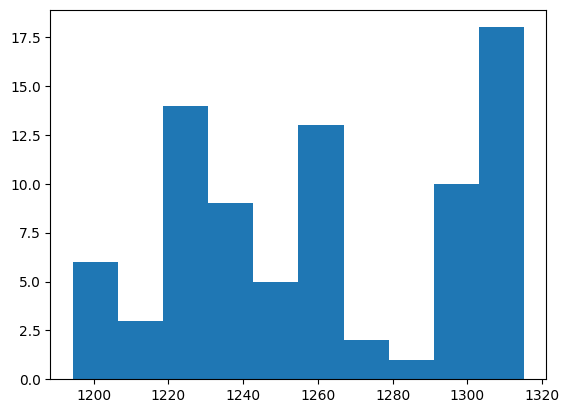

In [16]:
plt.hist(df_combo['Temp_from_Fo_all'])

## Lets propagate uncertainty

In [17]:
## Duan and Zhang Error propagate. 
MC_Av_rho_T_df_B, MC_All_rho_T_df_B, fig=pf.propagate_FI_uncertainty(
T_K=df_combo['Temp_from_Fo_all']+273.15,
error_T_K=df_combo['Temp_error'], error_type_T_K='Abs', error_dist_T_K='normal',
CO2_dens_gcm3=df_combo['Density g/cm3'],error_CO2_dens=df_combo['σ Density g/cm3'], 
error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
XH2O=XH2O_av, error_XH2O=pd.Series(0.5*np.abs(XH2O_max-XH2O_min)), error_type_XH2O='Abs', error_dist_XH2O='normal',
sample_ID=df_combo['filename'],
model='denlinger_lerner',
N_dup=500, fig_i=0, plot_figure=False)

You have entered a value for XH2O, so we are now using the EOS of Duan and Zhang 200 regardless of what model you selected. If you dont want this, specify XH2O=None
Please note, the DZ2006 EOS is about 5-40X slower to run than the SP94 and SW94 EOS
We are using multiprocessing based on your selected EOS. You can override this by setting multiprocess=False in the function, but it might slow it down a lot
Number of processors:  8


In [18]:
K24=df_combo['filename'].str.contains('K24')
U919=df_combo['filename'].str.contains('919')

Text(0, 0.5, 'Depth (km)')

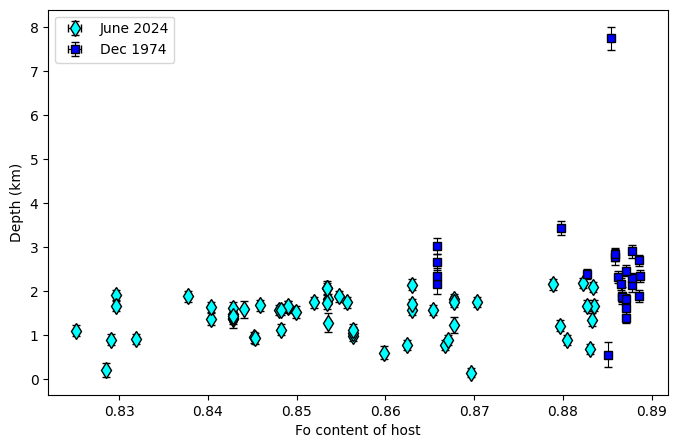

In [26]:
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))
ax1.errorbar(df_combo['Fo'].loc[K24], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[K24], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[K24],
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=8, mec='k', capsize=3, label='June 2024')
ax1.errorbar(df_combo['Fo'].loc[U919], MC_Av_rho_T_df_B['SingleCalc_D_km'].loc[U919], xerr=0, yerr=MC_Av_rho_T_df_B['std_dev_MC_D_km_from_percentile'].loc[U919],
             fmt='s', ecolor='k', elinewidth=0.8, mfc='blue', ms=6, mec='k', capsize=3, label='Dec 1974')
ax1.legend()
ax1.set_xlabel('Fo content of host')
ax1.set_ylabel('Depth (km)')